In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/MyDrive/suicide-rates.csv"

/content/drive/MyDrive/suicide-rates.csv


In [4]:
df = pd.read_csv('/content/drive/MyDrive/suicide-rates.csv')
# Printing the csv as a dataframe
display(df)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


# Question 1

## a) Basic EDA's

In [5]:
# Basic EDA's which includes cleaning data, data type conversions.
df.replace(np.nan, 0)
df_ = df[' gdp_for_year ($) '].to_list()
for i in range(0,len(df_)):
    df_[i] = df_[i].replace(',', '')
df.drop(' gdp_for_year ($) ', axis=1,inplace=True)
df['gdp'] = df_
df['gdp'] = pd.to_numeric(df['gdp'])
display(df)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita ($),generation,gdp
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,796,Generation X,2156624900
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,796,Silent,2156624900
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,796,Generation X,2156624900
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,796,G.I. Generation,2156624900
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,796,Boomers,2156624900
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,2309,Generation X,63067077179
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,2309,Silent,63067077179
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,2309,Generation Z,63067077179
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,2309,Generation Z,63067077179


In [6]:
df = df.replace(np.nan, 0)
display(df)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita ($),generation,gdp
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.000,796,Generation X,2156624900
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.000,796,Silent,2156624900
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.000,796,Generation X,2156624900
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.000,796,G.I. Generation,2156624900
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.000,796,Boomers,2156624900
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,2309,Generation X,63067077179
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,2309,Silent,63067077179
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,2309,Generation Z,63067077179
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,2309,Generation Z,63067077179


In [9]:
df['gdp'] = pd.to_numeric(df['gdp'])
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
gdp_per_capita ($)      int64
generation             object
gdp                     int64
dtype: object

## b) Discrete Variables

### i) Mode

In [7]:
# Mode for discrete variable Year
import statistics as st
print('mode of discrete variable Year is :',st.mode(df['year']))


mode of discrete variable Year is : 2009
mode of discrete variable suicide_no is : 0


### ii) Entropy

In [8]:
# Entropy for discrete variable Year
def entropy(column):
    count = df[column].value_counts(normalize=True, sort=False)
    return -(count*np.log(count)).sum()

print(entropy('year'))

3.4329561237563206
5.243743260094842


## c) Continuous Variables

####i) Calculating mean, variance, minimum, maximum, skew, lower quartile, upper quartile and intrquartile range for each continuous variables


In [11]:
# Defining a list of continuous variables
continuous_variables=['population','suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)', 'gdp', 'suicides_no']

# Calculating mean, variance, minimum, maximum, skew, lower quartile, upper quartile and intrquartile range for each continuous variables
mean = []

for col in continuous_variables:
    mean.append(np.mean(df[col]))
    print('mean for ', col, '=', np.mean(df[col]))

variance = []

for col in continuous_variables:
    variance.append(np.var(df[col]))
    print('mvariance for ', col, '=', np.var(df[col]))

min = []

for col in continuous_variables:
    min.append(np.min(df[col]))
    print('minimum for ', col, '=', np.min(df[col]))

max = []

for col in continuous_variables:
    max.append(np.max(df[col]))
    print('maximum for ', col, '=', np.max(df[col]))

skew = []

for col in continuous_variables:
    skew.append(scipy.stats.skew(df[col]))
    print('skew for ', col, '=', scipy.stats.skew(df[col]))

lower_quartile = []

for col in continuous_variables:
    lower_quartile.append(np.quantile(df[col], 0.25))
    print('lower quartile for ', col, '=', np.quantile(df[col], 0.25))

upper_quartile = []

for col in continuous_variables:
    upper_quartile.append(np.quantile(df[col], 0.75))
    print('upper quartile for ', col, '=', np.quantile(df[col], 0.75))

interquartile = [(x1 - x2) for (x1, x2) in zip(upper_quartile, lower_quartile)]

for i in range(0, len(continuous_variables)):
  print('interquartile range for ', continuous_variables[i], ' = ', interquartile[i])

mean for  population = 1844793.6173975556
mean for  suicides/100k pop = 12.816097411933864
mean for  HDI for year = 0.233482818116463
mean for  gdp_per_capita ($) = 16866.464414090584
mean for  gdp = 445580969025.7266
mean for  suicides_no = 242.57440690150972
mvariance for  population = 15301468364340.932
mvariance for  suicides/100k pop = 359.52597619683723
mvariance for  HDI for year = 0.12942932777811145
mvariance for  gdp_per_capita ($) = 356727721.8250097
mvariance for  gdp = 2.11290603932235e+24
mvariance for  suicides_no = 813661.1958654822
minimum for  population = 278
minimum for  suicides/100k pop = 0.0
minimum for  HDI for year = 0.0
minimum for  gdp_per_capita ($) = 251
minimum for  gdp = 46919625
minimum for  suicides_no = 0
maximum for  population = 43805214
maximum for  suicides/100k pop = 224.97
maximum for  HDI for year = 0.944
maximum for  gdp_per_capita ($) = 126352
maximum for  gdp = 18120714000000
maximum for  suicides_no = 22338
skew for  population = 4.459173975

### ii) Boxplot

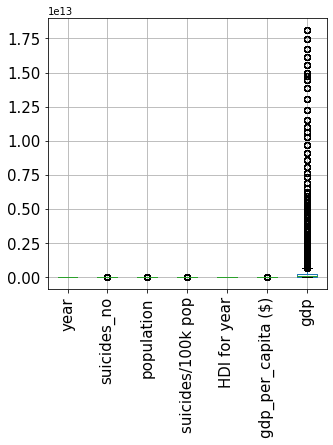

In [12]:
# Boxplot for continuos variables
df.boxplot(grid = True, figsize=(5, 5), rot=90, fontsize=15)
plt.show()

### iii) Histogram for too few, too many and sufficient number of bins

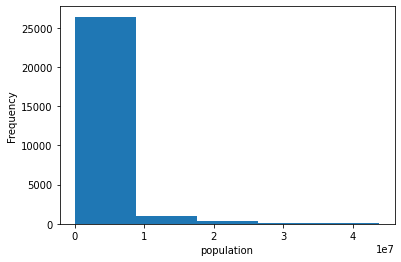

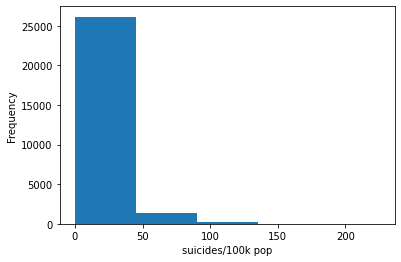

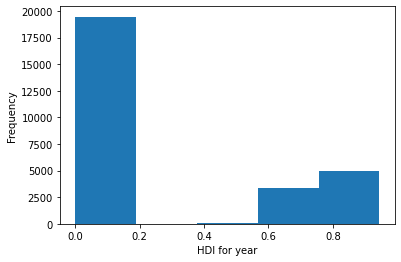

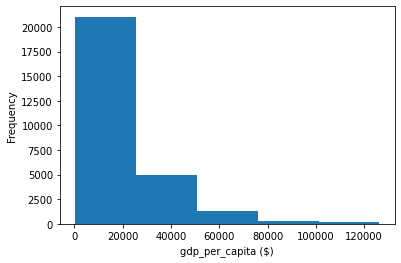

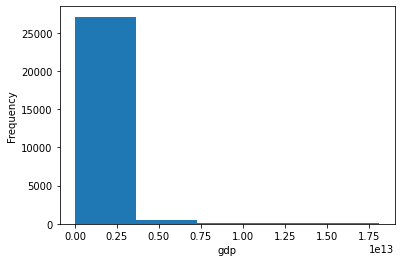

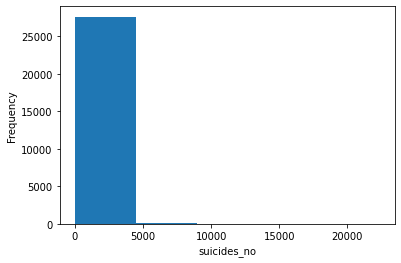

In [13]:
# Histogram for too few bins
for col in continuous_variables:
    plt.hist(df[col], bins=5)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

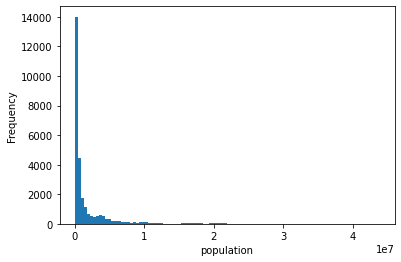

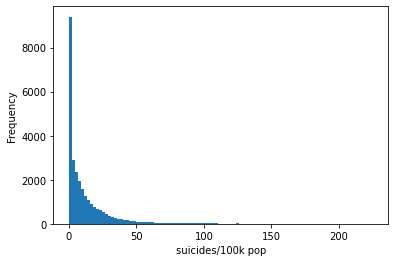

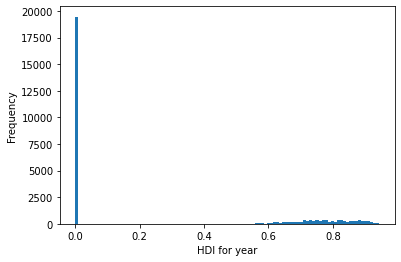

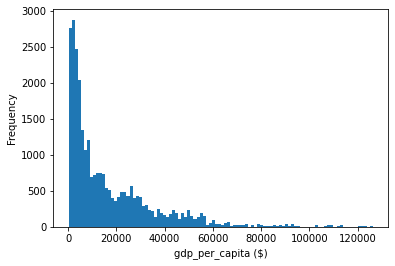

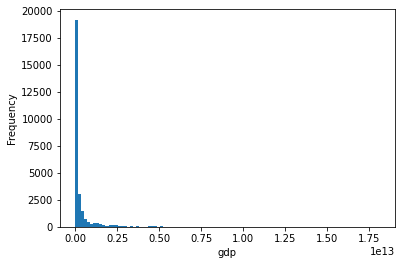

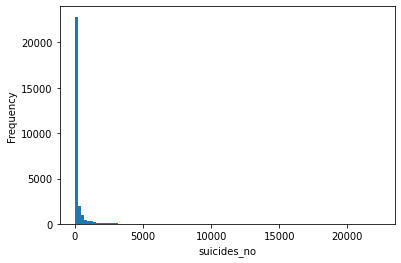

In [14]:
# Histogram for too many bins
for col in continuous_variables:
    plt.hist(df[col], bins=100)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

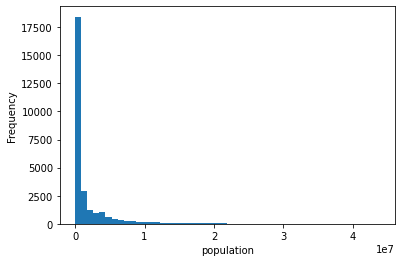

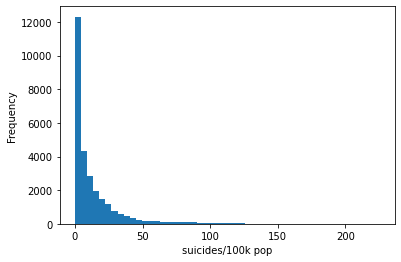

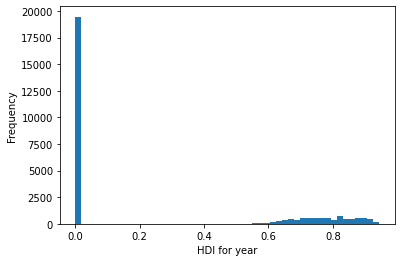

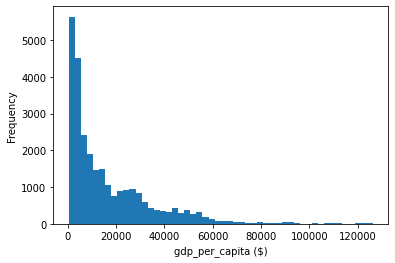

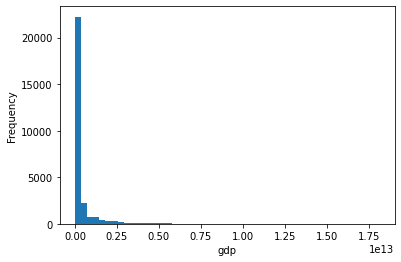

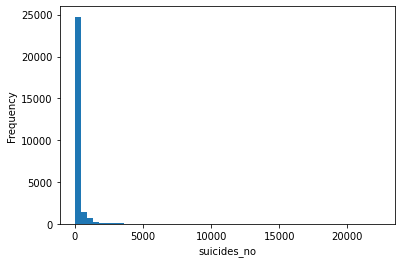

In [15]:
# Histogram for suffucient number of bins
for col in continuous_variables:
    plt.hist(df[col], bins=50)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## d) Pair-wise interaction

### i) Boxplot for continuous variables according to discrete variables

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


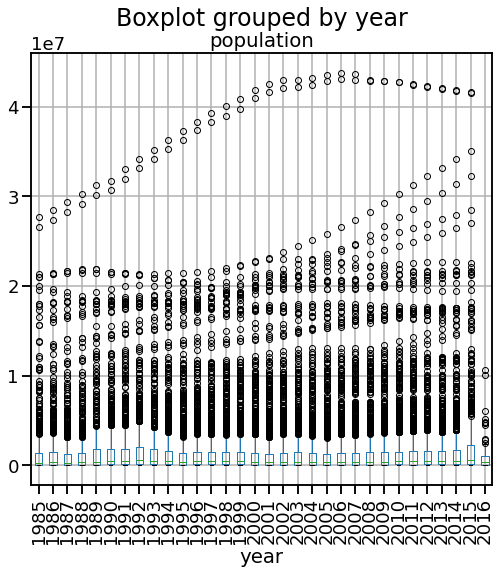

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


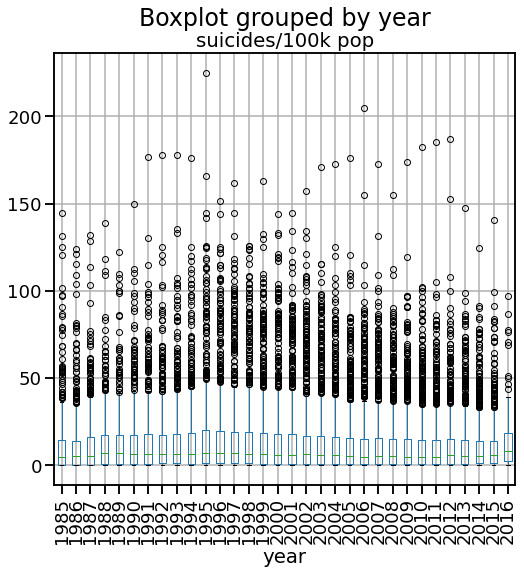

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


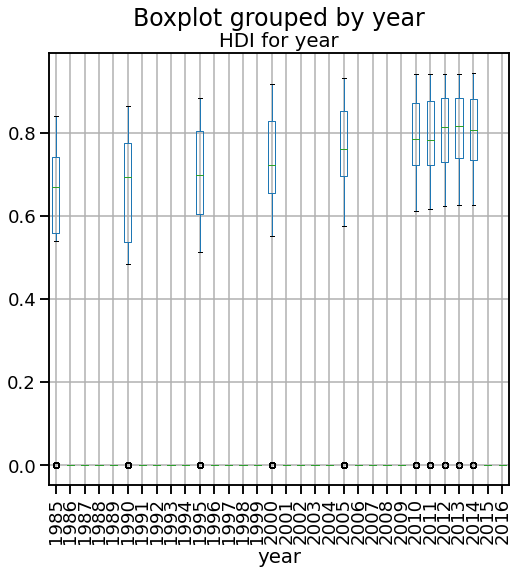

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


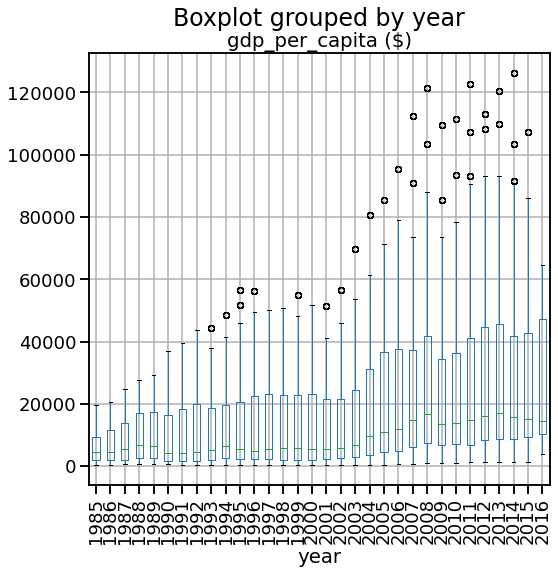

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


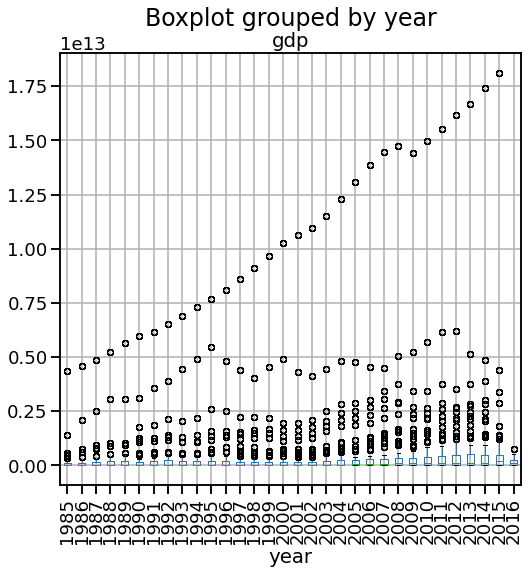

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


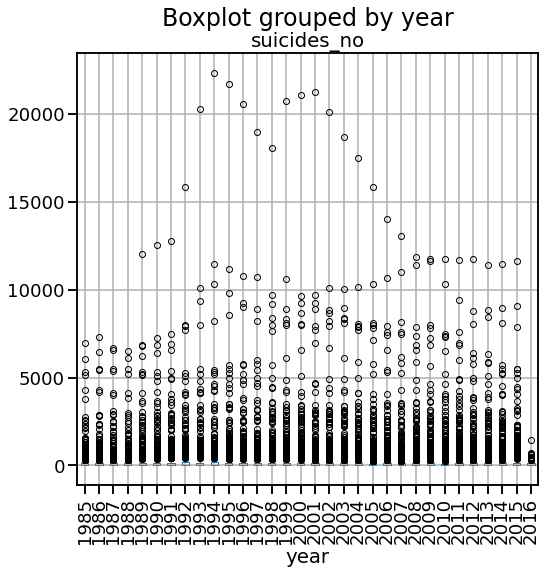

In [40]:
# Boxplot for continuous variables according to discrete variables
discrete_variables = ['year']
for column in discrete_variables:
  for col in continuous_variables:
    df.boxplot(col, by=column, figsize=(10,10))
    plt.xticks(rotation=90)
    plt.show()

### ii) Heatmap

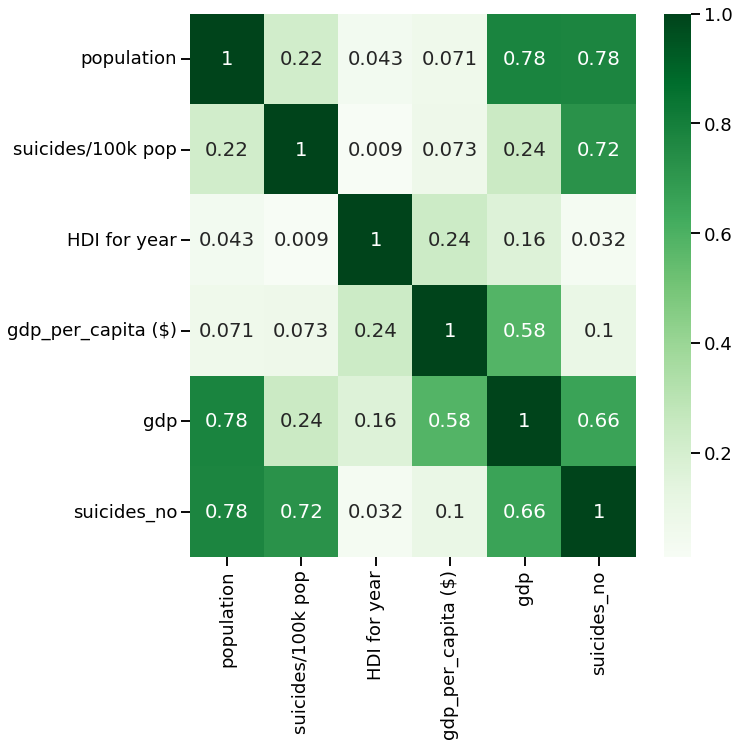

In [41]:
# Correlation matrix for continuous variables
corrMatrix = df[continuous_variables].corr(method='spearman') # Use spearman for non-linear
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(abs(corrMatrix), annot=True, cmap='Greens') # Show absolute value
plt.show()

# Question 2)

## i) Top Six countries according to average yearly suicide rates

Russian Federation 37804.4375
United States 32312.90625
Japan 25215.6875
France 10285.21875
Ukraine 9998.4375
Germany 9101.9375


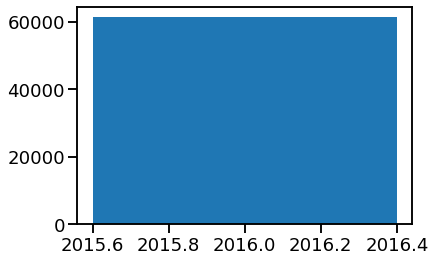

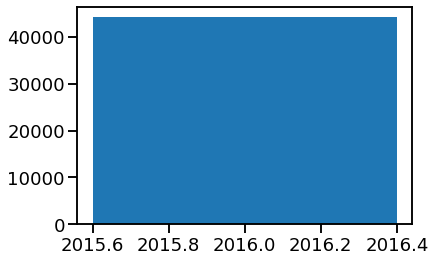

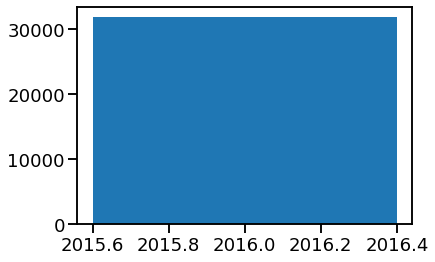

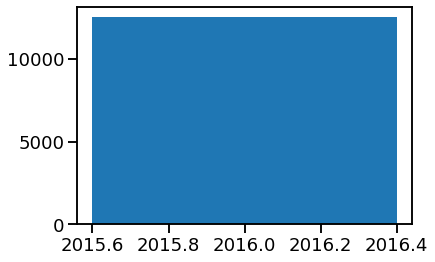

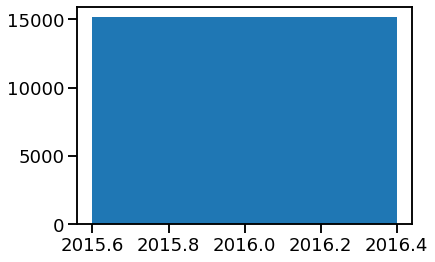

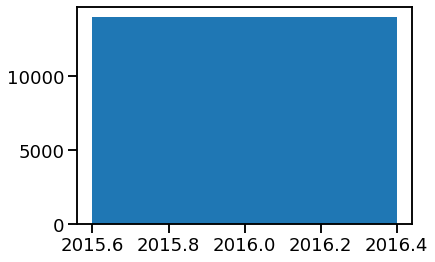

In [64]:
# Preparing a list of countries
countries = df['country'].unique()
years = df['year'].unique()

# Averaging over number of suicides per year
avg_yearly_suicides = []
for country in countries:
    df_country = df[df['country']==country]
    avg_yearly_suicides.append((np.sum(df_country['suicides_no']))/32)

# Creating a dictionary for which has country and their average yearly suicide rates
Country_dict = dict(zip(countries, avg_yearly_suicides))

# Sorting the dictionary
sorted_countries = sorted(Country_dict.items(), key=lambda x: x[1], reverse=True)

counter = 0
top_countries = []

# Printing countries with most average yearly suicide rates in descending order
for i in sorted_countries:
    if counter < 6:
        print(i[0], i[1])
        counter = counter + 1
        top_countries.append(i[0])


In [62]:
# Top six countries
print(top_countries)

['Russian Federation', 'United States', 'Japan', 'France', 'Ukraine', 'Germany']


## ii) Comparison based on age groups

In [45]:
# Defining a age list for comparison in future cells
age_df = df['age'].unique()
age_list = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
print(age_list)

['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']


In [46]:
# Defining a 2*2 array with age intervals as columns and top six countries as rows
suicide_matrix = []
for country in top_countries:
    agewise_suicide_column  = []
    df1 = df[df['country'] == country]
    for age in age_df:
        df2 = df1[df1['age'] == age]
        agewise_suicide_column.append(np.sum(df2['suicides_no']))
    suicide_matrix.append(agewise_suicide_column)
print(suicide_matrix)

[[148611, 479140, 74211, 231187, 267753, 8840], [141679, 380917, 95677, 182047, 224770, 8923], [52288, 278679, 106571, 94529, 272705, 2130], [19849, 123510, 55872, 42510, 86509, 877], [27509, 124721, 25753, 49633, 90385, 1949], [17902, 97833, 52557, 32947, 89191, 832]]


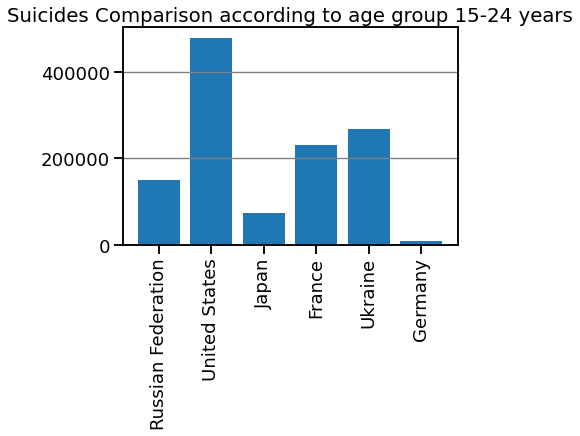

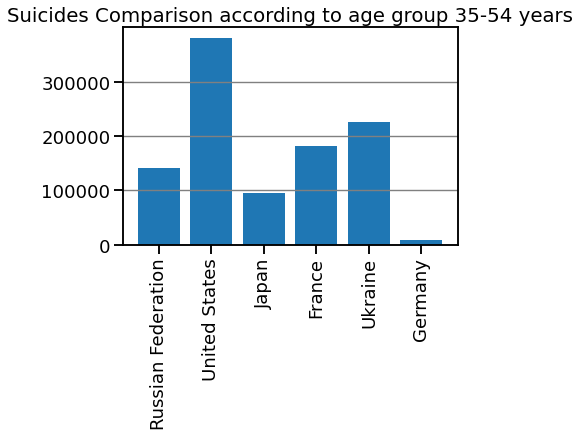

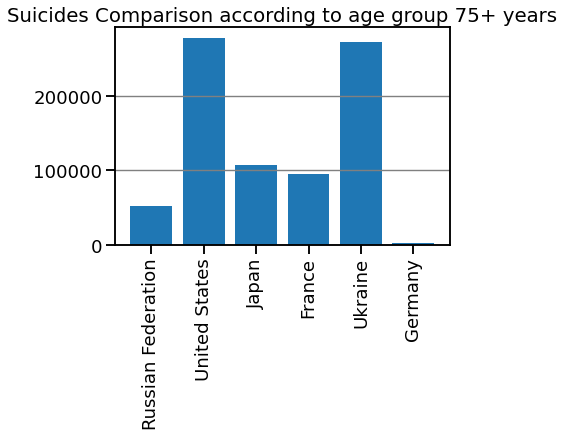

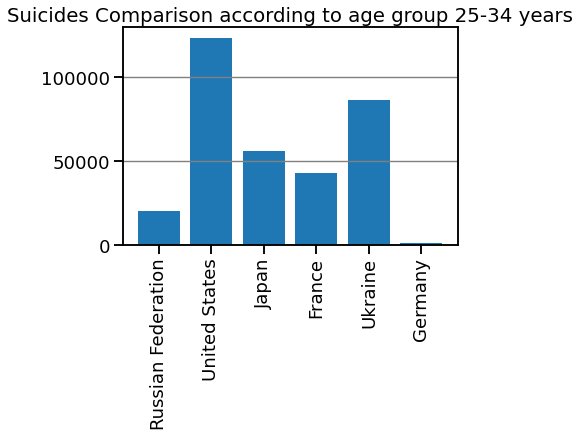

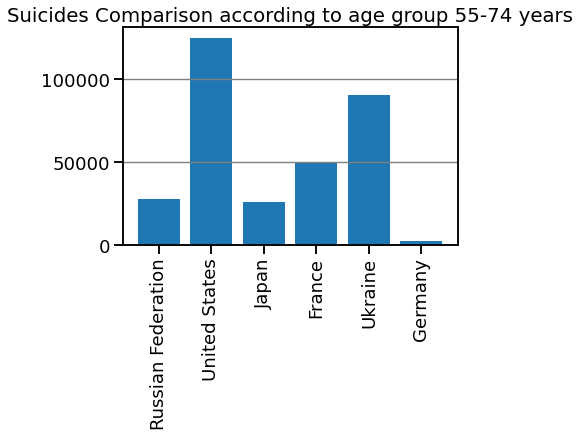

In [47]:
# Plotting bar plot for comparing suicide rates for each age group
for i in range(0,5):
    fig = plt.figure()
    plt.grid(True, axis = 'y', color = "grey", linewidth = "1.4", linestyle = 'solid')
    plt.bar(top_countries, suicide_matrix[0:5][i])
    plt.title("Suicides Comparison according to age group "+ str(age_df[i]))
    plt.xticks(rotation = 90)
    plt.show()

## iii) Consistency between the difference of male and female suicide rates

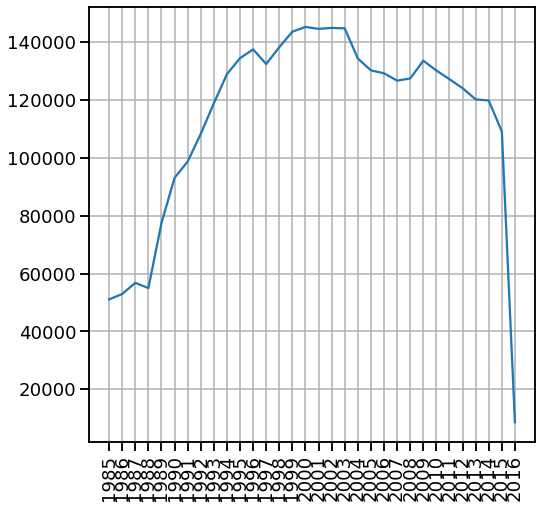

In [61]:
# Preparing some dataframes which will be used for genderwise analysis
male_df = df[df['sex'] == 'male']
female_df = df[df['sex'] == 'female']
male_suicide_list = []
female_suicide_list = []

# Genderwise yearly suicides list
for year in year_list:
    df6 = male_df[male_df['year'] == year]
    df7 = female_df[female_df['year'] == year]
    male_suicide_list.append(np.sum(df6['suicides_no']))
    female_suicide_list.append(np.sum(df7['suicides_no']))

# Difference between the suicide rates for male and female
difference_in_suicide_rates = [(x1 - x2) for (x1, x2) in zip(male_suicide_list, female_suicide_list)]

# Plotting a line graph which can be used to check consistence between the male and female suicide rates
plt.figure(figsize=(8,8))
plt.plot(year_list, difference_in_suicide_rates)
plt.grid(True, linestyle = 'solid')
plt.xticks(year_list, rotation = 90)
plt.show()


From the above line graph, it is evident that there is no consistency in difference between female and male suicide rates. However, we can see that the graph is almost horizontal for some intervals. Those intervals are (2000, 2003) and (2013, 2014)

iv) Worst year for each genration in US

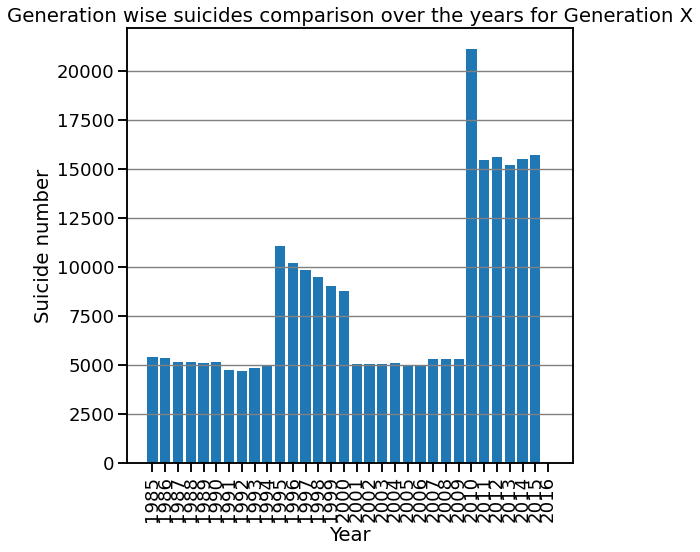

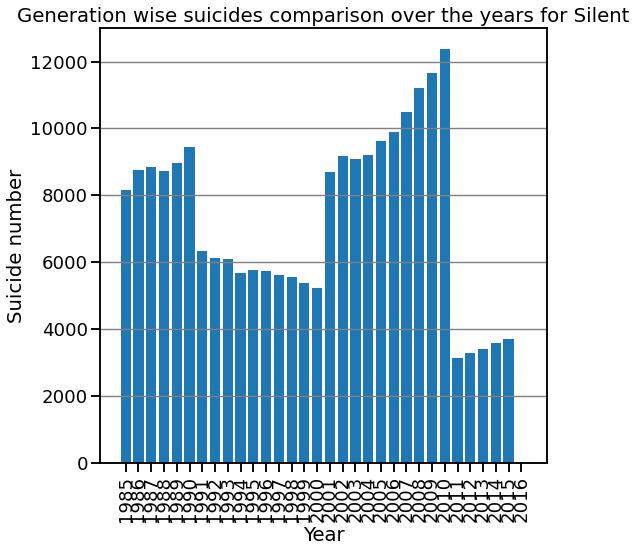

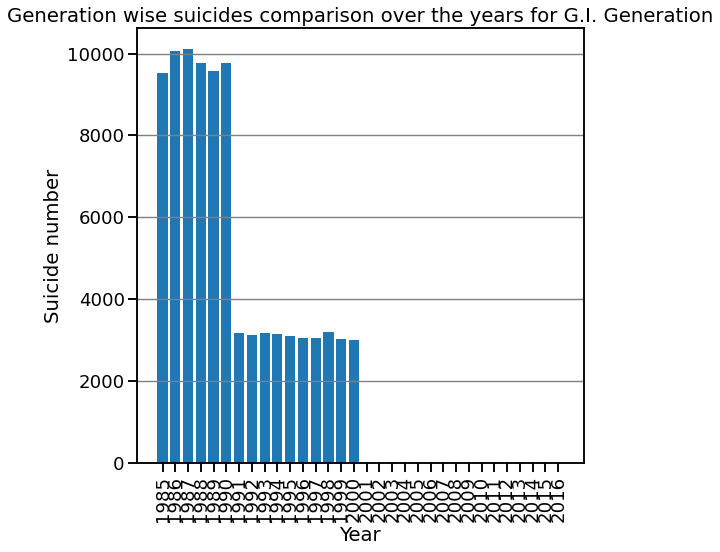

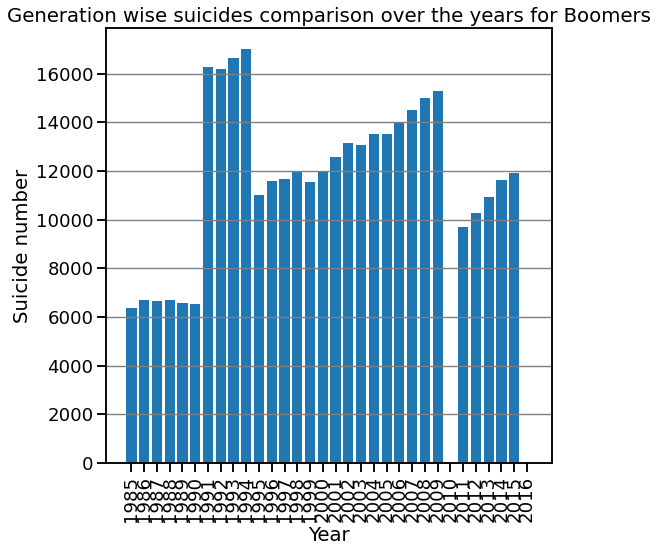

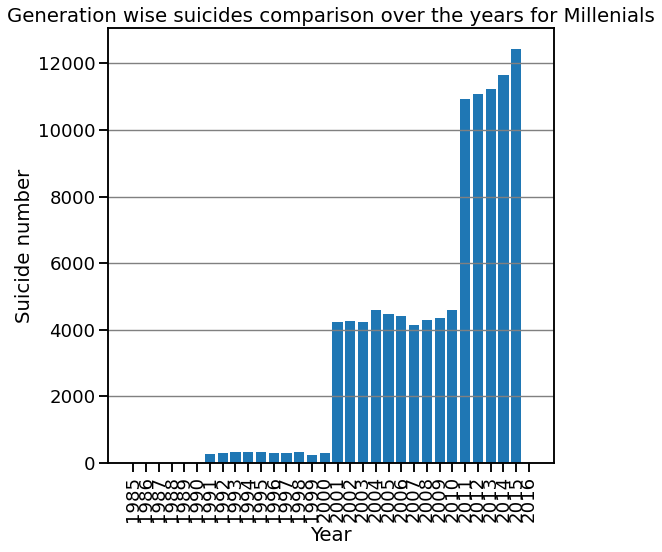

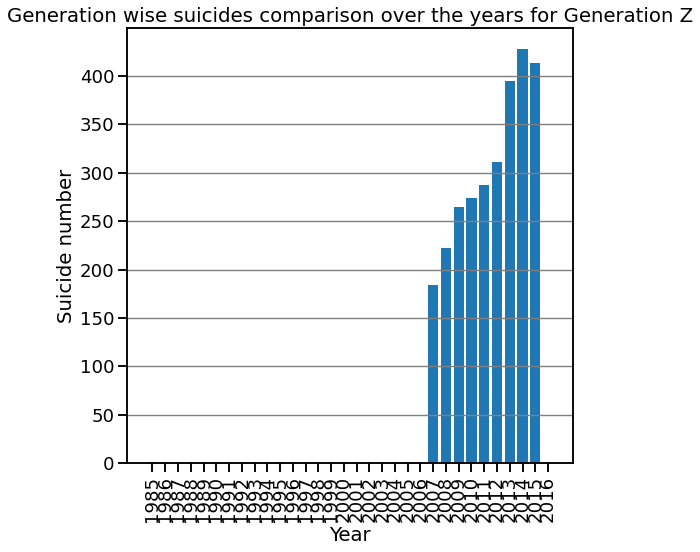

In [50]:
# Defining some basic required dataframes and lists which will be used by generation-wise comparison of suicide rates for united states
us_df = df[df['country']=='United States']
generation = df['generation'].unique()
year_arr = df['year'].unique()
year_list = sorted(list(year_arr))
generationwise_suicide_list = []

# Plotting bar plots for different generations over the years
for gen in generation:
    df4 = us_df[us_df['generation'] == gen]
    for year in year_list:
        df5 = df4[df4['year'] == year]
        generationwise_suicide_list.append(np.sum(df5['suicides_no']))
    plt.figure(figsize=(8,8))
    plt.grid(True, axis = 'y', color = "grey", linewidth = "1.4", linestyle = 'solid')
    plt.bar(year_list, generationwise_suicide_list)
    plt.xlabel('Year')
    plt.ylabel('Suicide number')
    plt.xticks(year_list, rotation = 90)
    plt.title('Generation wise suicides comparison over the years for '+ str(gen))
    plt.show()
    generationwise_suicide_list.clear()    

From the above bar graphs, worst years for each generation are as follows:
1.  Generation X - 2010
2.  Silent - 2010
3.  GI Generation - 1987
4.  Boomers - 1994
5.  Millenials -2015
6.  Generation Z - 2014

## v) Bihistogram for the top six countries

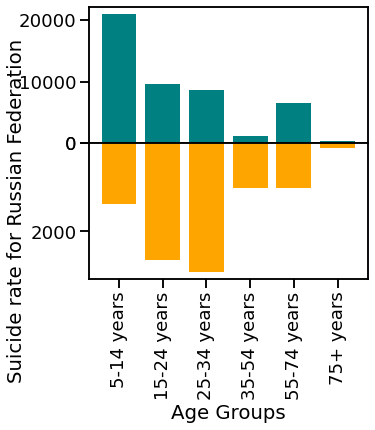

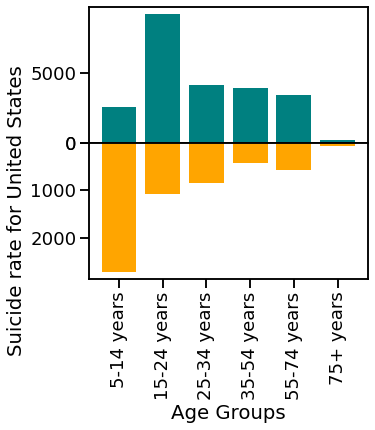

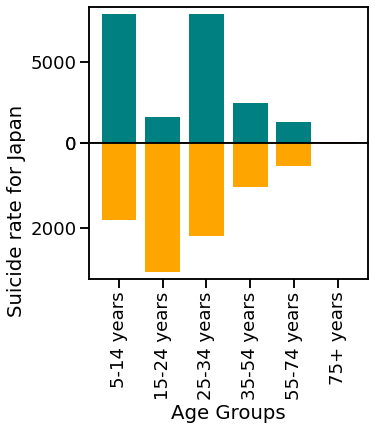

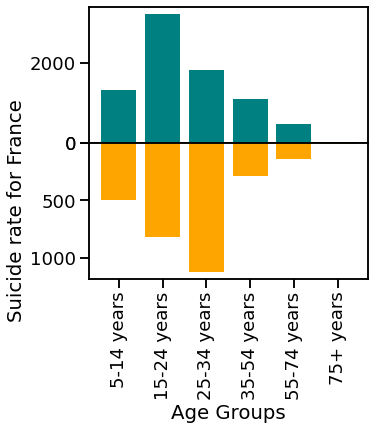

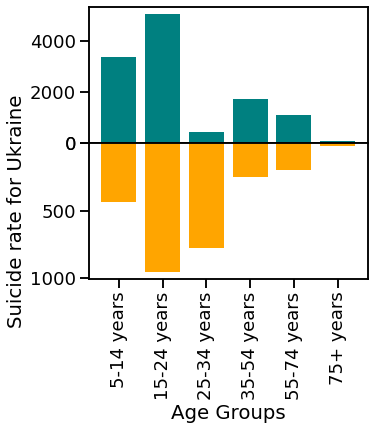

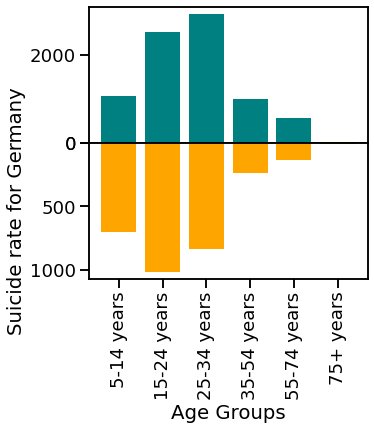

In [59]:
for Country in top_countries:
    # Preparing some dataframes and lists which will be used for plotting the bihistogram for Japan.
    mdf_2000 = male_df[male_df['year'] == 2000]
    mdf__2000 = mdf_2000[mdf_2000['country'] == Country]
    mdf_s = mdf__2000['suicides_no']
    mdf_suicide = mdf_s.to_list()

    fdf_2000 = female_df[female_df['year'] == 2000]
    fdf__2000 = fdf_2000[fdf_2000['country'] == Country]
    fdf_s = fdf__2000['suicides_no']
    fdf_suicide = fdf_s.to_list()

    # Creating a new dataframe for japan whose columns are Male and Female and rows are agewise suicide rate
    df_2000 = pd.DataFrame(list(zip(mdf_suicide, fdf_suicide)), columns =['Male', 'Female'])          

    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(5,5))

    # Plotting two bar graphs, in which graph for female suicide rate will have inverted axis.
    for ax, column, color, invert in zip(axes.ravel(), df_2000.columns, ['teal', 'orange'],  [False,True]):
        ax.bar(age_list, df_2000[column], color=color)
        if invert:
            ax.invert_yaxis()

    # Some required plot adjustments        
    plt.subplots_adjust(hspace=0)
    plt.xlabel('Age Groups')
    plt.ylabel('Suicide rate for ' + str(Country) )
    plt.xticks(age_list, rotation = 90)
    plt.show()

# the Blue graph is for males and the orange graph is for females.

## vi) Bubble chart

In [34]:
# Defining lists for suicide rate and population
suicide_list = []
suicide_rate = df['suicides_no']
suicide_r = suicide_rate.to_list()
pop_list = []
pop = df['population']
pop_r = pop.to_list()

# Appending the log values of population and suicide rate.
for i in range(0, 27820):
    pop_list.append(np.log(pop_r[i]))
for i in range(0, 27820):
    suicide_list.append(np.log(suicide_r[i]))

# Adding two new columns for log values of suicide rates and population to original dataframe 
df['suicide_list'] = suicide_list
df['log_pop'] = pop_list


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


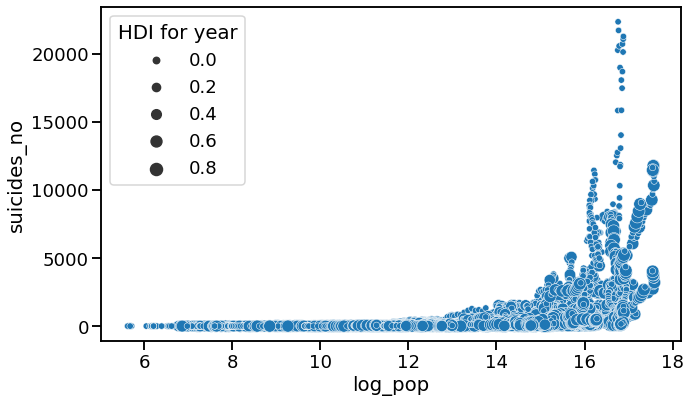

In [52]:
# Plotting the bubble chart for population vs suicide rates and the size of the bubbles is determined by HDI values for that year
sb.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10, 6))
sb.scatterplot(x='log_pop', y='suicides_no', size='HDI for year', data=df)
plt.tight_layout()
plt.show()

From the above bubble char, we can see that the small bubbles have higher y co-ordinates. Whereas, larger bubble, corresponding to higher HDI have lower y co-ordinates. Hence lesser the HDI, higher suicide rates and vice-versa.

# References

1.   [Pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
2.   Geeks for Geeks
3.   StackOverflow 